In [1]:
###Importing Required file

In [54]:
pip install pyforest

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pyforest import*
lazy_imports()

['import plotly.graph_objs as go',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.manifold import TSNE',
 'import altair as alt',
 'from sklearn.preprocessing import OneHotEncoder',
 'import sys',
 'from sklearn.linear_model import Lasso',
 'from sklearn.ensemble import RandomForestRegressor',
 'from xlrd import open_workbook',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from sklearn.decomposition import PCA',
 'from dask import dataframe as dd',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import plotly as py',
 'import re',
 'from pyspark import SparkContext',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import matplotlib as mpl',
 'from sklearn.linear_model import RidgeCV',
 'import matplotlib.pyplot as plt',
 'from scipy import signal as sg',
 'import xgboost as xgb',
 'from sklearn.feature_extraction.text impor

In [4]:
#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
loan_Export=pd.read_csv('loanExport.csv')

<IPython.core.display.Javascript object>

In [7]:
loan_Export.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [8]:
###**Exploratory Data Analysis**

In [9]:
print('Loan_Export : ' , loan_Export.shape)

Loan_Export :  (291451, 28)


In [10]:
loan_Export.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [11]:
loan_Export.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [12]:
print("Loan Export:\n")
print(loan_Export.isnull().sum().sort_values(ascending=False),"\n\n",loan_Export.isnull().sum()/loan_Export.shape[0] *100,"\n\n")

Loan Export:

SellerName            24994
CreditScore               0
FirstPaymentDate          0
MonthsDelinquent          0
EverDelinquent            0
ServicerName              0
NumBorrowers              0
OrigLoanTerm              0
LoanPurpose               0
LoanSeqNum                0
PostalCode                0
PropertyType              0
PropertyState             0
ProductType               0
PPM                       0
Channel                   0
OrigInterestRate          0
LTV                       0
OrigUPB                   0
DTI                       0
OCLTV                     0
Occupancy                 0
Units                     0
MIP                       0
MSA                       0
MaturityDate              0
FirstTimeHomebuyer        0
MonthsInRepayment         0
dtype: int64 

 CreditScore           0.000000
FirstPaymentDate      0.000000
FirstTimeHomebuyer    0.000000
MaturityDate          0.000000
MSA                   0.000000
MIP                   0.000000


In [13]:
print("SellerName :\n", loan_Export.SellerName.value_counts(), "\n\n")

SellerName :
 Ot    76943
CO    34479
FL    25573
FI    24581
ST    22243
NO    16184
OL     7776
PR     7365
BA     7093
GM     6566
BI     6407
G      4734
CH     4599
CR     4459
FT     4105
WA     3139
AC     3076
HO     2970
PN     2407
RE     1758
Name: SellerName, dtype: int64 




In [14]:
print("SellerName \n",[loan_Export['SellerName'].mode().values[0]])

SellerName 
 ['Ot']


In [15]:
loan_Export['SellerName'] = loan_Export['SellerName'].fillna(
loan_Export['SellerName'].dropna().mode().values[0])

In [16]:
loan_Export['SellerName'].isnull().sum(),loan_Export['SellerName'].isnull().sum()

(0, 0)

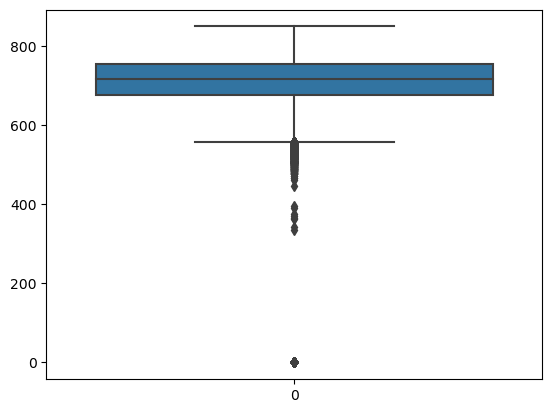

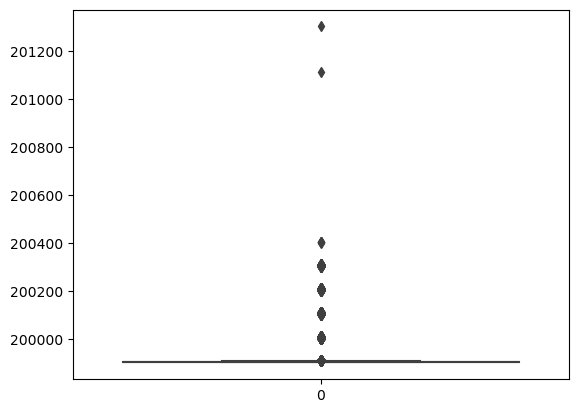

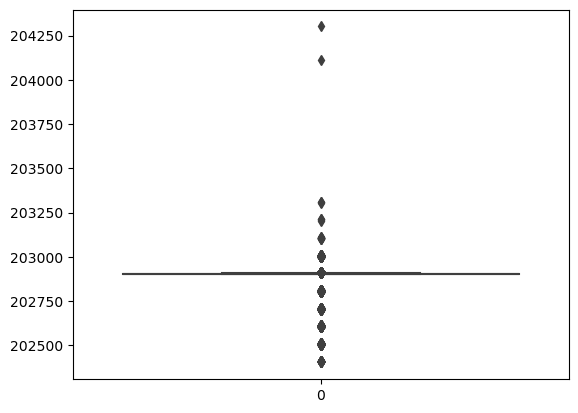

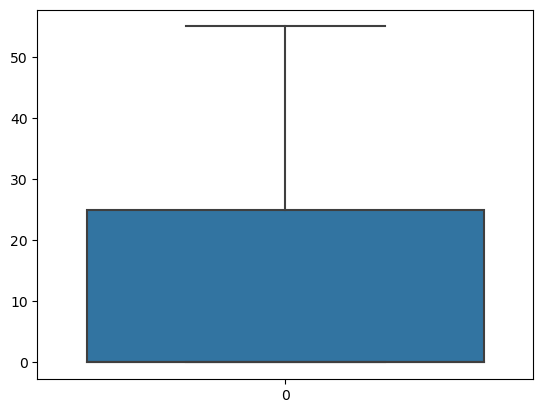

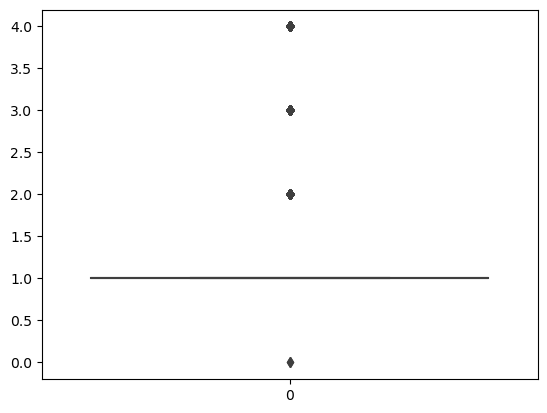

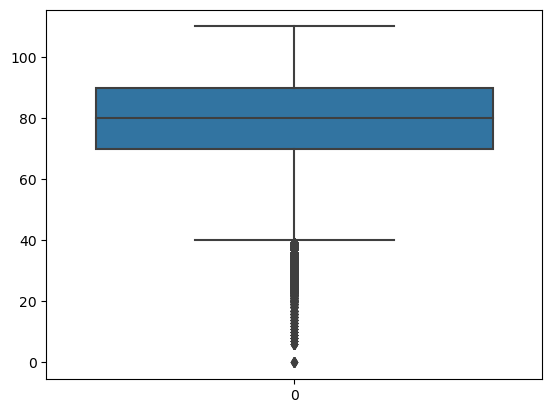

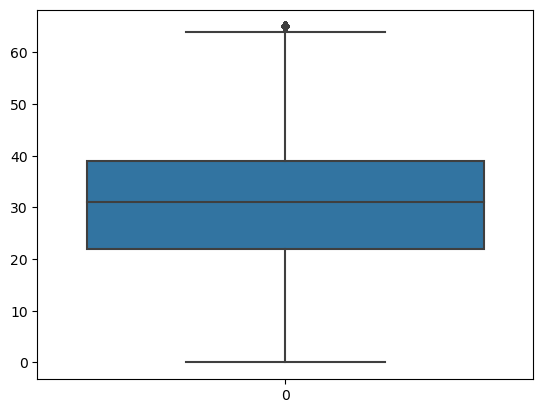

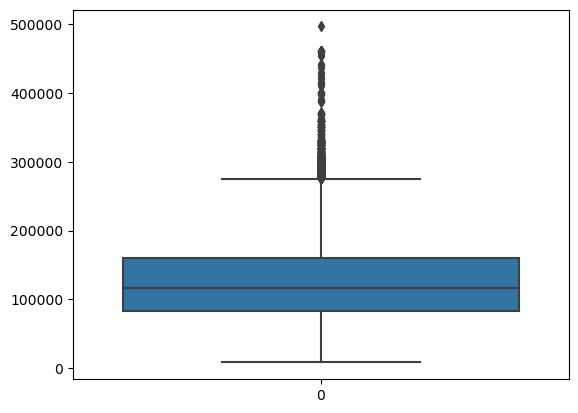

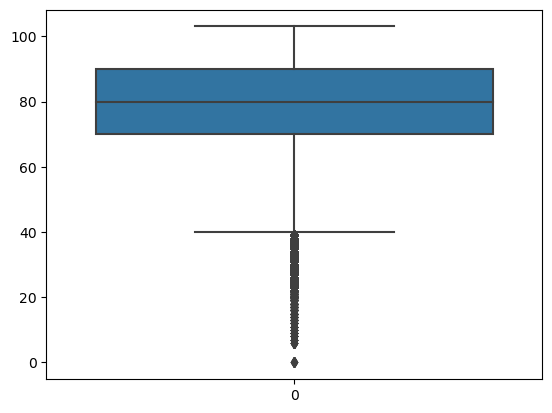

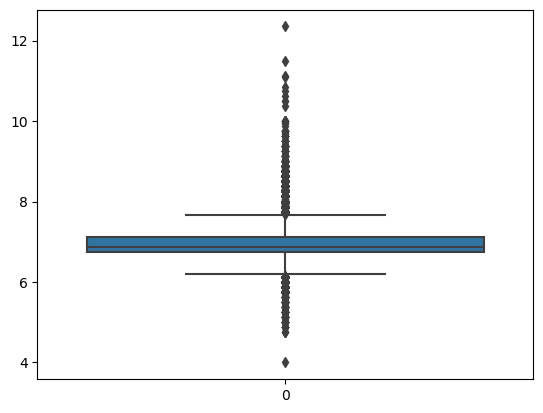

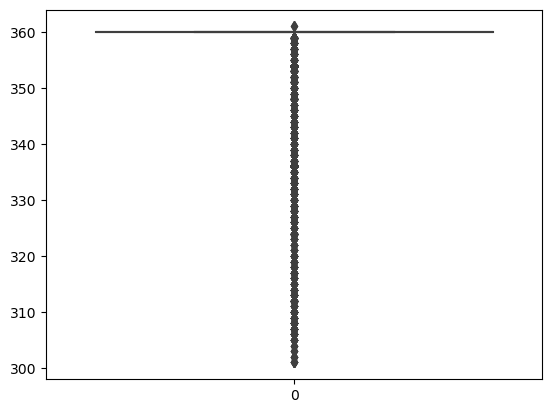

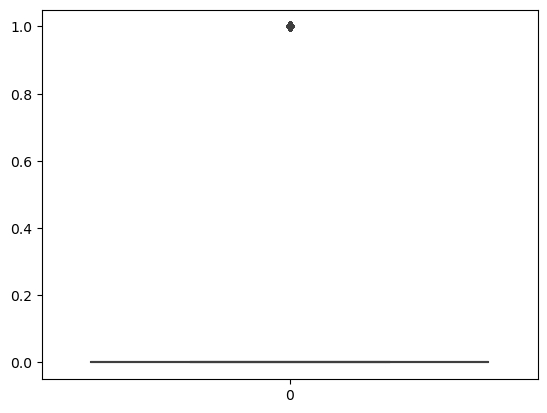

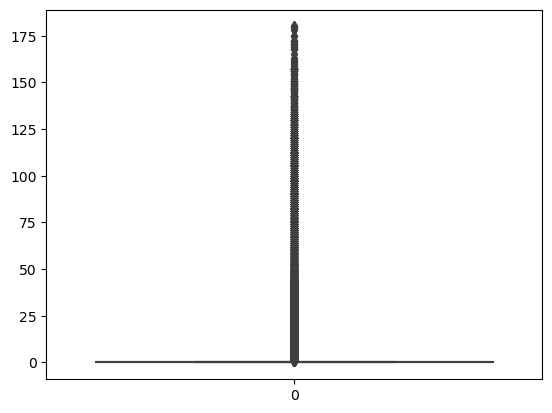

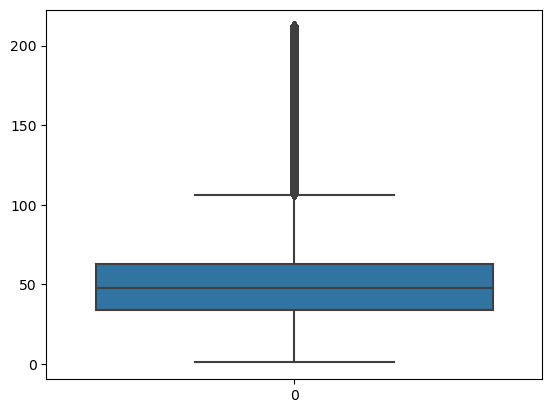

In [17]:
for i in loan_Export.describe().columns:
  sns.boxplot(loan_Export[i].dropna())
  plt.show()

In [18]:
print("loan_Export:\n")
print(loan_Export.info())

loan_Export:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         

In [19]:
#list of all the numeric columns
num = loan_Export.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = loan_Export.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  loan_Export[num]
#categoric df
BM_cat = loan_Export[cat]

print(num)
print(cat)

[loan_Export[category].value_counts() for category in cat[1:]]

['CreditScore', 'FirstPaymentDate', 'MaturityDate', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment']
['FirstTimeHomebuyer', 'MSA', 'Occupancy', 'Channel', 'PPM', 'ProductType', 'PropertyState', 'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose', 'NumBorrowers', 'SellerName', 'ServicerName']


[X        39100
 31084     9338
 16974     8771
 12060     6985
 47644     6673
          ...  
 21940        3
 49500        2
 25020        1
 10380        1
 32420        1
 Name: MSA, Length: 392, dtype: int64,
 O    276131
 I      8734
 S      6586
 Name: Occupancy, dtype: int64,
 T    167670
 R    123219
 C       407
 B       155
 Name: Channel, dtype: int64,
 N    282125
 X      5405
 Y      3921
 Name: PPM, dtype: int64,
 FRM      291451
 Name: ProductType, dtype: int64,
 CA    43327
 FL    19133
 MI    16285
 IL    13621
 TX    13092
 OH    11545
 CO    10127
 GA    10024
 NC     9983
 WA     9927
 AZ     9248
 VA     8096
 NY     7913
 PA     7738
 NJ     7457
 OR     6658
 MA     6392
 IN     6228
 MD     5515
 MO     5400
 MN     5092
 UT     4996
 WI     4660
 TN     4556
 SC     4473
 AL     4128
 KY     3896
 NV     3564
 CT     3253
 KS     2321
 ID     2296
 LA     2092
 NM     2053
 IA     1860
 OK     1803
 NE     1532
 NH     1320
 VT      945
 AR      938
 MS      

In [20]:
#Loan_Export
loan_Export['LoanPurpose'].replace(['P', 'N', 'C'], 
                                  ['Purchase','No_Cash_Out','Cash_Out'],inplace = True)

In [21]:
#check result
loan_Export.LoanPurpose.value_counts()

Purchase       123404
No_Cash_Out    110036
Cash_Out        58011
Name: LoanPurpose, dtype: int64

In [22]:
loan_Export.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,Purchase,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,No_Cash_Out,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,No_Cash_Out,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,No_Cash_Out,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,No_Cash_Out,360,2,GM,GMACMTGECORP,0,0,54


In [23]:
### Univariate Plots

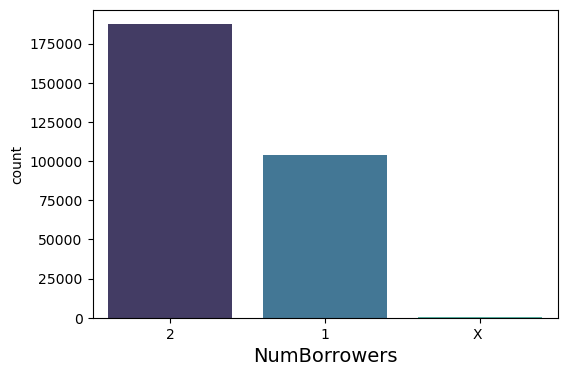

In [24]:
#categorical columns:
['FirstPaymentDate', 'MIP', 'OCLTV', 'DTI', 
 'Units', 'OrigLoanTerm', 'NumBorrowers']
 
plt.figure(figsize=(6,4))
sns.countplot(x='NumBorrowers' , data=loan_Export ,palette='mako')
plt.xlabel('NumBorrowers', fontsize=14)
plt.show()

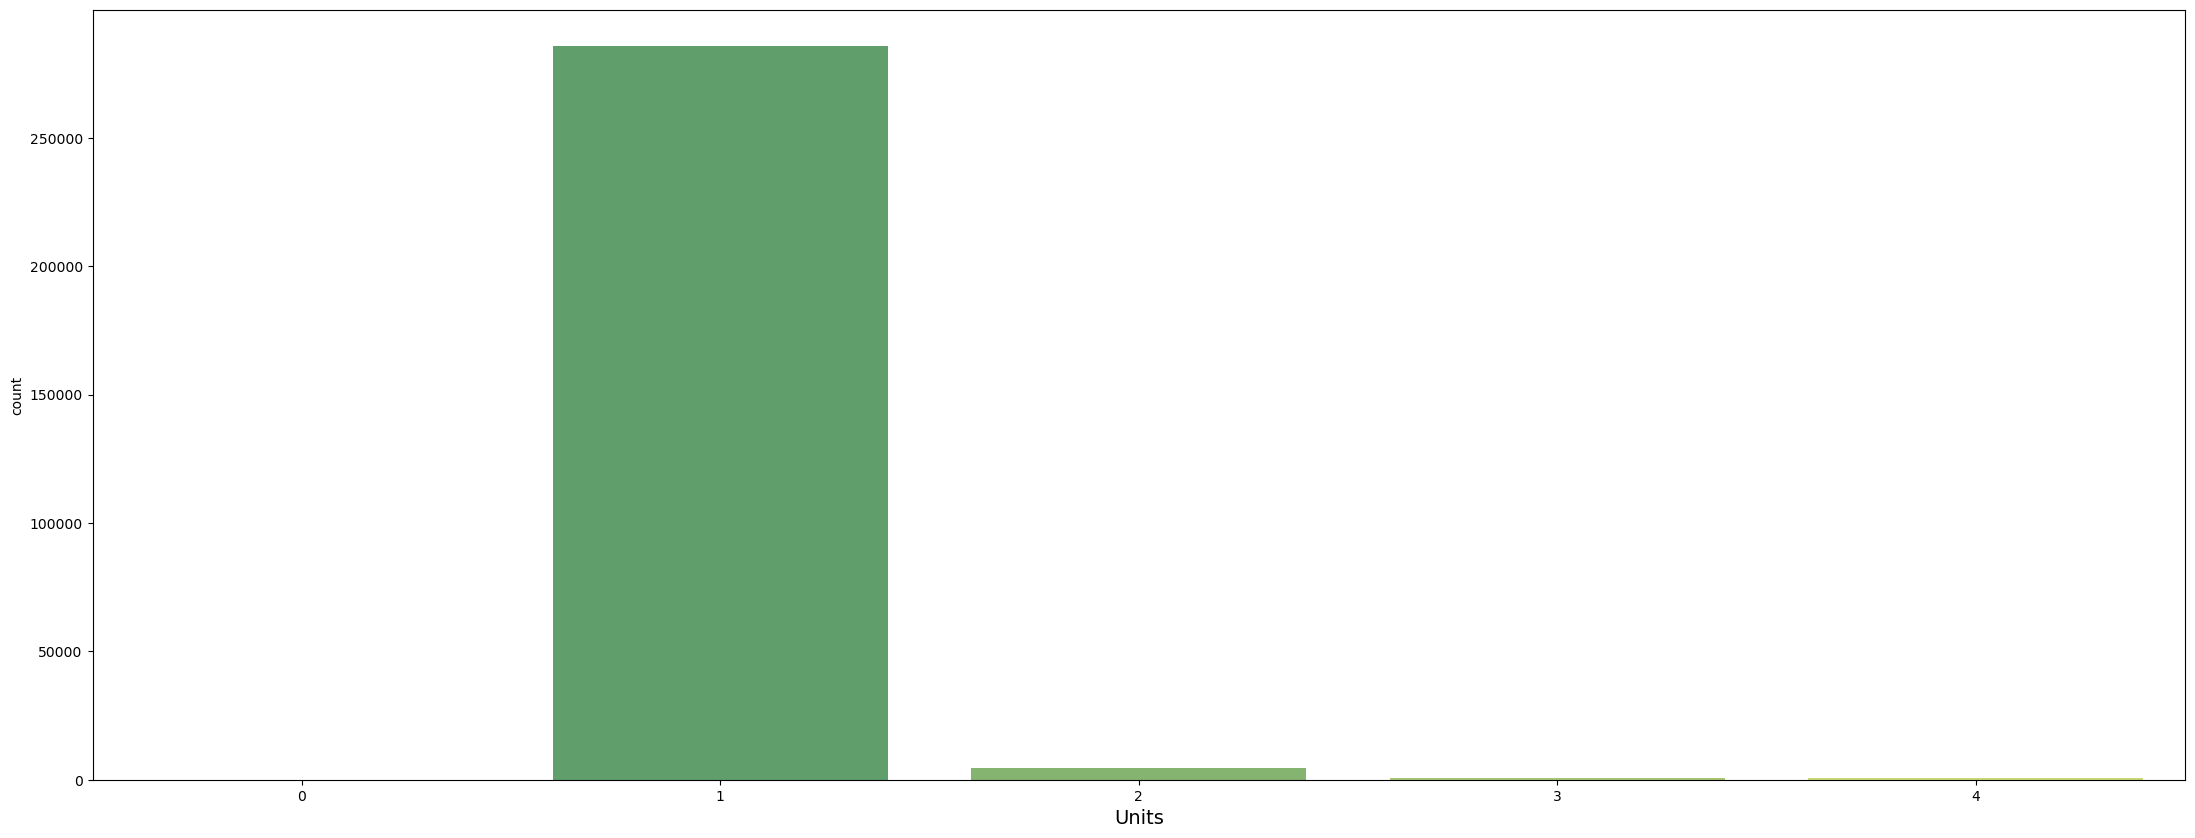

In [25]:
plt.figure(figsize=(27,10))
sns.countplot(x='Units' , data=loan_Export ,palette='summer')
plt.xlabel('Units', fontsize=14)
plt.show()

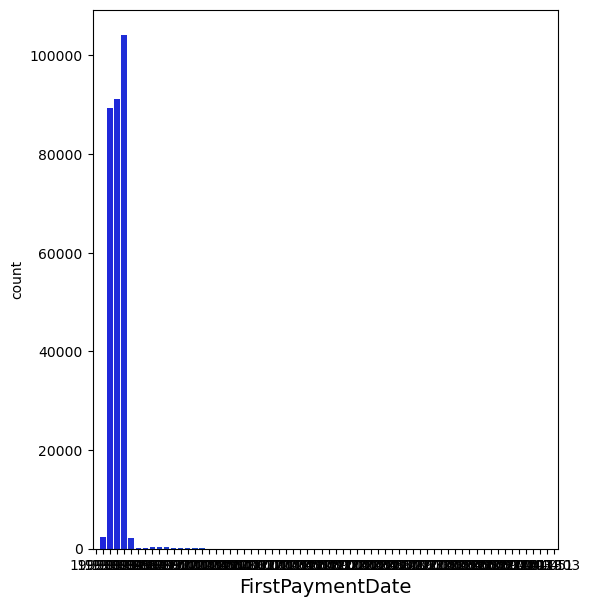

In [26]:
plt.figure(figsize=(6,7))
sns.countplot(x='FirstPaymentDate' , data=loan_Export ,palette='winter')
plt.xlabel('FirstPaymentDate', fontsize=14)
plt.show()

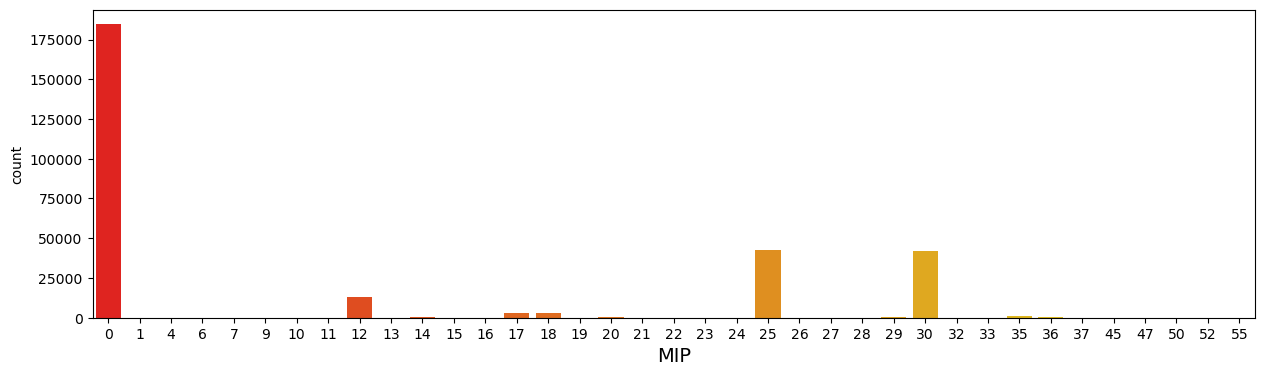

In [27]:
plt.figure(figsize=(15,4))
sns.countplot(x='MIP' , data=loan_Export ,palette='autumn')
plt.xlabel('MIP', fontsize=14)
plt.show()

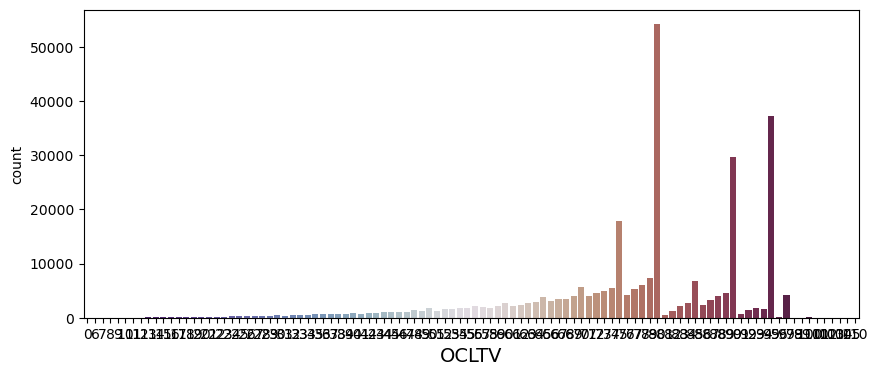

In [28]:
plt.figure(figsize=(10,4))
sns.countplot(x='OCLTV' , data=loan_Export ,palette='twilight_shifted')
plt.xlabel('OCLTV', fontsize=14)
plt.show()

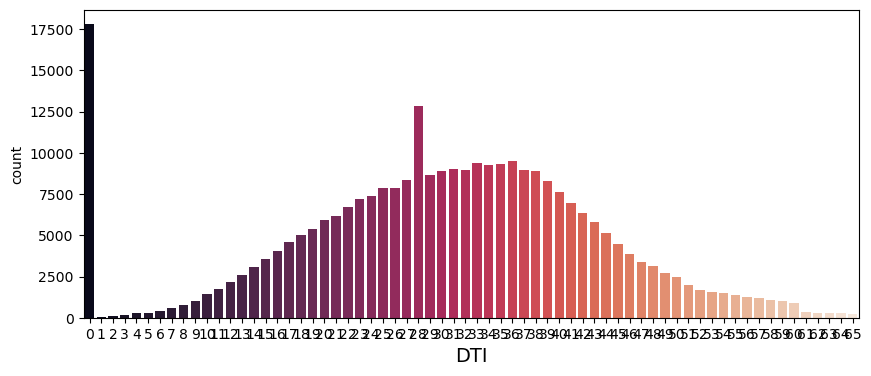

In [29]:
plt.figure(figsize=(10,4))
sns.countplot(x='DTI' , data=loan_Export ,palette='rocket')
plt.xlabel('DTI', fontsize=14)
plt.show()

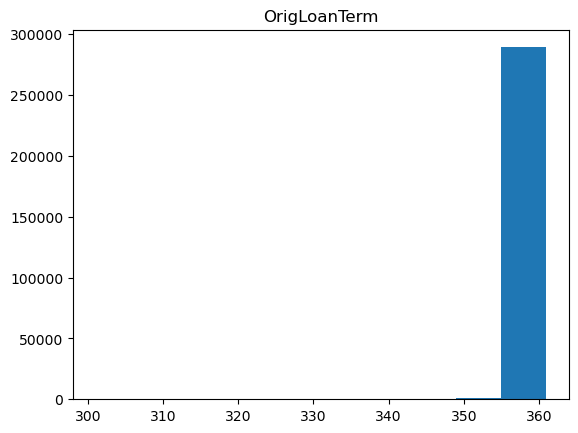

In [30]:
#list of all the numeric columns
num = loan_Export.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  loan_Export[num]

plt.hist(loan_Export['OrigLoanTerm'])
plt.title("OrigLoanTerm")
plt.show()

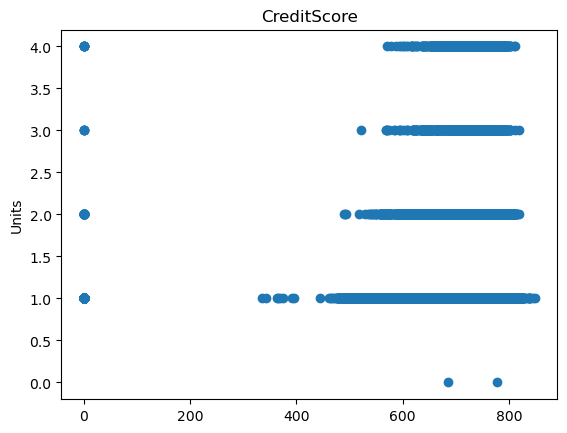

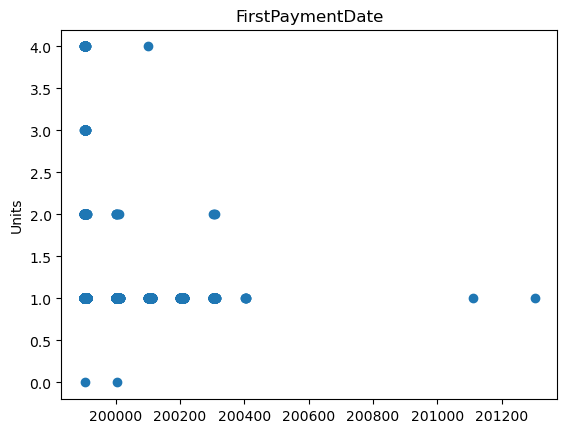

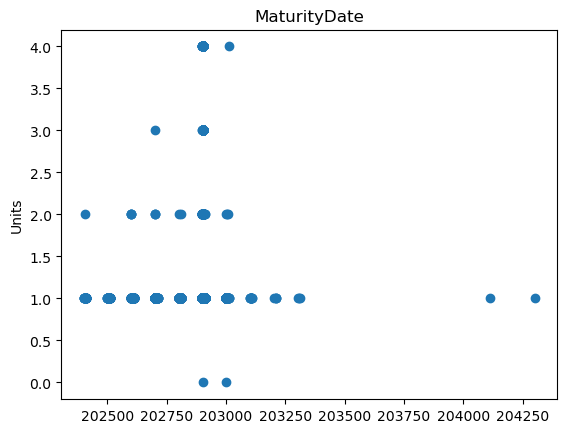

In [31]:
#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Units'])
    plt.title(numeric)
    plt.ylabel('Units')
    plt.show()

In [32]:
### multivariate plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


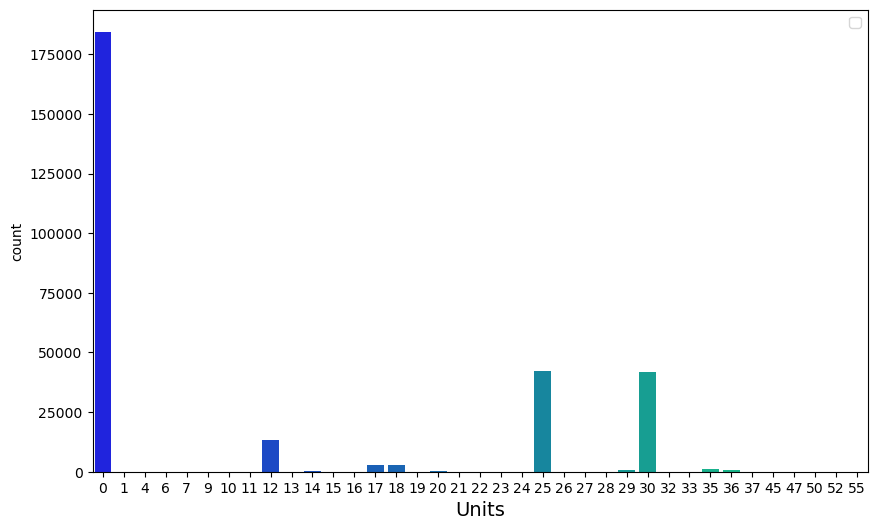

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x='MIP' , data=loan_Export ,palette='winter')
plt.xlabel('Units', fontsize=14)
plt.legend()
plt.show()

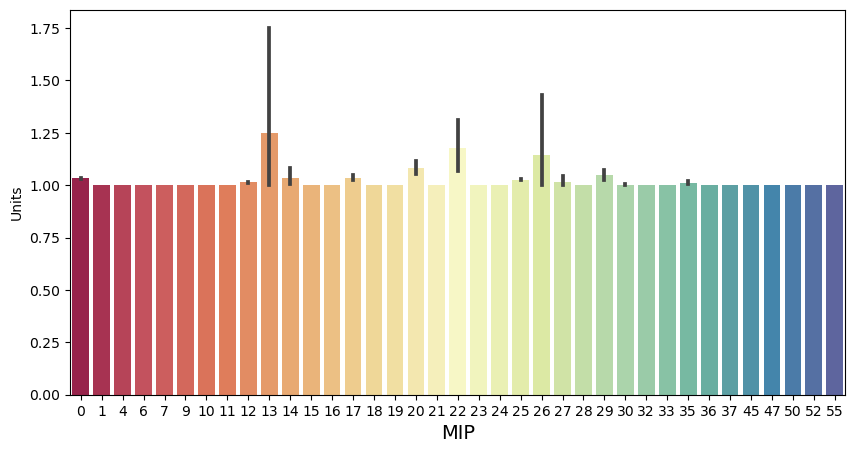

In [34]:
plt.figure(figsize=(10, 5))
sns.barplot(x='MIP', y='Units', data=loan_Export, palette='Spectral')
plt.xlabel('MIP', fontsize=14)
plt.show()

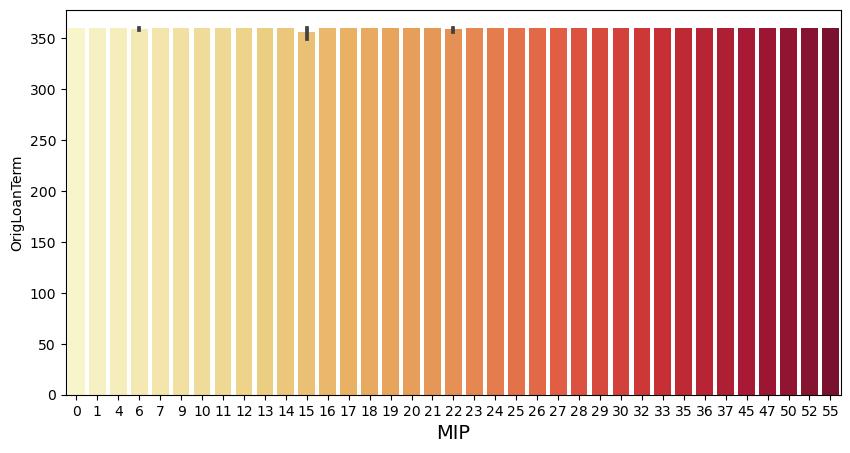

In [35]:
plt.figure(figsize=(10, 5))
sns.barplot(x='MIP', y='OrigLoanTerm', data=loan_Export, palette='YlOrRd')
plt.xlabel('MIP', fontsize=14)
plt.show()

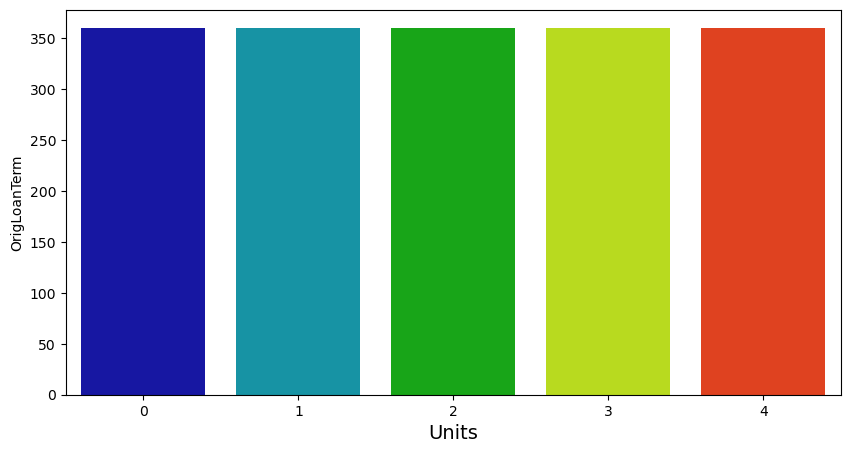

In [36]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Units', y='OrigLoanTerm', data=loan_Export, palette='nipy_spectral')
plt.xlabel('Units', fontsize=14)
plt.show()

<Axes: >

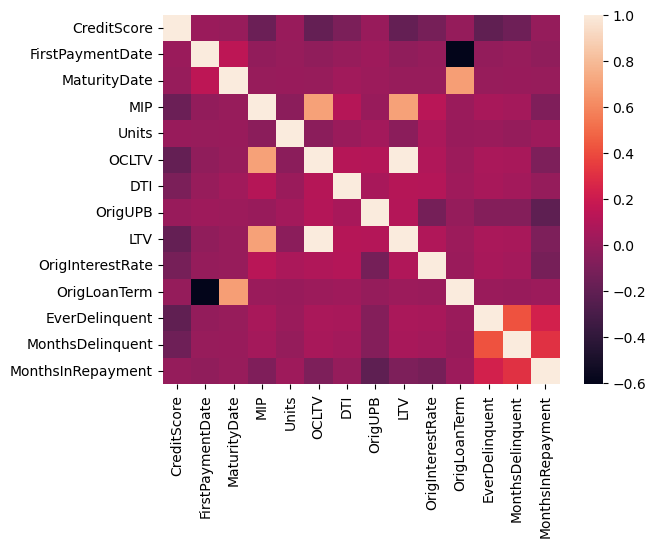

In [37]:
#plotting the correlation matrix
sns.heatmap(loan_Export.corr() ,cmap='rocket')

In [38]:
### Feature Engineering

In [39]:
BM_cat.apply(lambda x: x.nunique()) #checking the number of unique values in each column

FirstTimeHomebuyer         3
MSA                      392
Occupancy                  3
Channel                    4
PPM                        3
ProductType                1
PropertyState             53
PropertyType               7
PostalCode              1767
LoanSeqNum            291451
LoanPurpose                3
NumBorrowers               3
SellerName                20
ServicerName              20
dtype: int64

In [40]:
loan_Export.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [41]:
y = loan_Export.CreditScore

In [42]:
##**ML Building**

In [43]:
loan_features = ['MIP' , 'DTI' , 'OCLTV' , 'Units']

In [44]:
X = loan_Export[loan_features]

In [45]:
X.describe()

,MIP,DTI,OCLTV,Units
count,291451.000000,291451.000000,291451.000000,291451.000000
mean,9.216685,30.033453,76.960529,1.026022
std,12.648273,13.203974,15.236154,0.202986
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,70.000000,1.000000
50%,0.000000,31.000000,80.000000,1.000000
75%,25.000000,39.000000,90.000000,1.000000
max,55.000000,65.000000,110.000000,4.000000


In [46]:
X.head()

,MIP,DTI,OCLTV,Units
0,25,27,89,1
1,0,17,73,1
2,0,16,75,1
3,0,14,76,1
4,0,18,78,1


In [91]:
##**DecisionTreeRegressor**

In [59]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
loanExport_model = DecisionTreeRegressor(random_state=1)

# Fit model
loanExport_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [60]:
print("Making predictions for the following loan: ")
print(X.head())
print("The predictions are")
print(loanExport_model.predict(X.head()))

Making predictions for the following loan: 
   MIP  DTI  OCLTV  Units
0   25   27     89      1
1    0   17     73      1
2    0   16     75      1
3    0   14     76      1
4    0   18     78      1
The predictions are
[691.968      693.2375     704.94466403 712.19148936 713.36111111]


In [87]:


tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

tree.fit(X_train,y_train)
tree_pred = tree.predict(X_train)

In [89]:
tree_pred

array([699.50299401, 741.18644068, 734.4301676 , ..., 721.04867104,
       716.00444444, 709.01805054])

In [90]:
tree_accuracy = round(tree.score(X_train,y_train)*100)
tree_accuracy

6

In [64]:
predictions = loanExport_model.predict(X)
print(predictions)

[691.968      693.2375     704.94466403 ... 719.23684211 703.56884058
 747.18181818]


In [84]:
##**RandomForestRegressor**

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

<IPython.core.display.Javascript object>

43.56868134667415


In [83]:
##**XGBRegressor**

In [69]:
from xgboost import XGBRegressor

X_train, X_valid, y_train, y_valid = train_test_split(X, y)
my_model = XGBRegressor()
my_model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [74]:
my_model.score(X_train, y_train)*100

7.605798349079262

In [82]:
##**LinearRiggrasion**

In [79]:
model.fit(X_train,y_train)
model_pred = loanExport_model.predict(X_train)
model_pred
model_accuracy = round(loanExport_model.score(X_train,y_train)*100)
model_accuracy

10

In [96]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_X= StandardScaler()    
X_train= st_X.fit_transform(X_train)    
X_test= st_X.transform(X_test)       

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train) 